In [106]:
# Libraries for working with multidimensional arrays
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4
import h5netcdf

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

# Disable warnings for data download via API
import urllib3 
urllib3.disable_warnings()

# 1. Population on spatial grid

Data for gridded population:
https://sedac.ciesin.columbia.edu/data/set/gpw-v4-population-count-rev11/data-download

In [107]:
Pop_data = f'../Climate_Data/gpw-v4-population-count-rev11_totpop_30_min_nc/gpw_v4_population_count_rev11_30_min.nc'
Pop_info = f'../Climate_Data/gpw-v4-population-count-rev11_totpop_30_min_nc/gpw_v4_netcdf_contents_rev11.csv'

In [108]:
df_pop = pd.read_csv(Pop_info)
print(df_pop.shape)
print(df_pop.columns)
print(df_pop.iloc[0:25])

(260, 4)
Index(['file_name', 'order', 'raster_name', 'raster_description'], dtype='object')
                          file_name  order  \
0     gpw_v4_population_count_rev11      1   
1     gpw_v4_population_count_rev11      2   
2     gpw_v4_population_count_rev11      3   
3     gpw_v4_population_count_rev11      4   
4     gpw_v4_population_count_rev11      5   
5     gpw_v4_population_count_rev11      6   
6     gpw_v4_population_count_rev11      7   
7     gpw_v4_population_count_rev11      8   
8     gpw_v4_population_count_rev11      9   
9     gpw_v4_population_count_rev11     10   
10    gpw_v4_population_count_rev11     11   
11    gpw_v4_population_count_rev11     12   
12    gpw_v4_population_count_rev11     13   
13    gpw_v4_population_count_rev11     14   
14    gpw_v4_population_count_rev11     15   
15    gpw_v4_population_count_rev11     16   
16    gpw_v4_population_count_rev11     17   
17    gpw_v4_population_count_rev11     18   
18    gpw_v4_population_count_rev1

In [109]:
ds_pop = xr.open_dataset(Pop_data)

In [110]:
ds_pop

<xarray.Dataset> Size: 21MB
Dimensions:                                                                 (
                                                                             longitude: 720,
                                                                             latitude: 360,
                                                                             raster: 20)
Coordinates:
  * longitude                                                               (longitude) float64 6kB ...
  * latitude                                                                (latitude) float64 3kB ...
  * raster                                                                  (raster) int32 80B ...
Data variables:
    Population Count, v4.11 (2000, 2005, 2010, 2015, 2020): 30 arc-minutes  (raster, latitude, longitude) float32 21MB ...
Attributes:
    proj4:        +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0...
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 2.8-4)
    date:         2018-11-16 09:56:38

In [111]:
# Raster 5 corresponds to the population in 2020
# Raster 11 corresponds to the country code
raster_5 = ds_pop.sel(raster=5)
raster_11 = ds_pop.sel(raster=11)

In [112]:
# Extract the variable data from these rasters
variable_1 = raster_5['Population Count, v4.11 (2000, 2005, 2010, 2015, 2020): 30 arc-minutes'].data
variable_2 = raster_11['Population Count, v4.11 (2000, 2005, 2010, 2015, 2020): 30 arc-minutes'].data

In [113]:
# Create a new xarray.Dataset with these two variables
ds_pop_red = xr.Dataset(
    {
        'Population_2020': (['latitude', 'longitude'], variable_1),
        'Country_code': (['latitude', 'longitude'], variable_2)
    },
    coords={
        'latitude': ds_pop['latitude'],
        'longitude': ds_pop['longitude']
    }
)

ds_pop_red

<xarray.Dataset> Size: 2MB
Dimensions:          (latitude: 360, longitude: 720)
Coordinates:
  * latitude         (latitude) float64 3kB 89.75 89.25 88.75 ... -89.25 -89.75
  * longitude        (longitude) float64 6kB -179.8 -179.2 ... 179.2 179.8
Data variables:
    Population_2020  (latitude, longitude) float32 1MB nan nan nan ... nan nan
    Country_code     (latitude, longitude) float32 1MB 3.277e+04 ... 3.277e+04

In [114]:
da_country = ds_pop_red['Country_code']
da_country = da_country.squeeze()
da_country = da_country.where(da_country <= 10000)
unique_values = np.unique(da_country)

# Print the unique values
print("Unique Values Appearing at Least Once:")
print(unique_values)
len(unique_values)

Unique Values Appearing at Least Once:
[  4.   8.  12.  16.  24.  28.  31.  32.  36.  40.  44.  48.  50.  51.
  52.  56.  60.  64.  68.  70.  72.  76.  84.  90.  92.  96. 100. 104.
 108. 112. 116. 120. 124. 132. 136. 140. 144. 148. 152. 156. 158. 170.
 174. 175. 178. 180. 184. 188. 191. 192. 196. 203. 204. 208. 212. 214.
 218. 222. 226. 231. 232. 233. 234. 238. 242. 246. 248. 250. 254. 258.
 262. 266. 268. 270. 275. 276. 288. 296. 300. 304. 308. 312. 316. 320.
 324. 328. 332. 340. 344. 348. 352. 356. 360. 364. 368. 372. 376. 380.
 384. 388. 392. 398. 400. 404. 408. 410. 414. 417. 418. 422. 426. 428.
 430. 434. 440. 442. 450. 454. 458. 462. 466. 470. 474. 478. 480. 484.
 496. 498. 499. 500. 504. 508. 512. 516. 520. 524. 528. 531. 533. 535.
 540. 548. 554. 558. 562. 566. 570. 574. 578. 580. 583. 584. 585. 586.
 591. 598. 600. 604. 608. 612. 616. 620. 624. 626. 630. 634. 638. 642.
 643. 646. 652. 654. 659. 660. 662. 666. 670. 678. 682. 686. 688. 690.
 694. 702. 703. 704. 705. 706. 710. 71

240

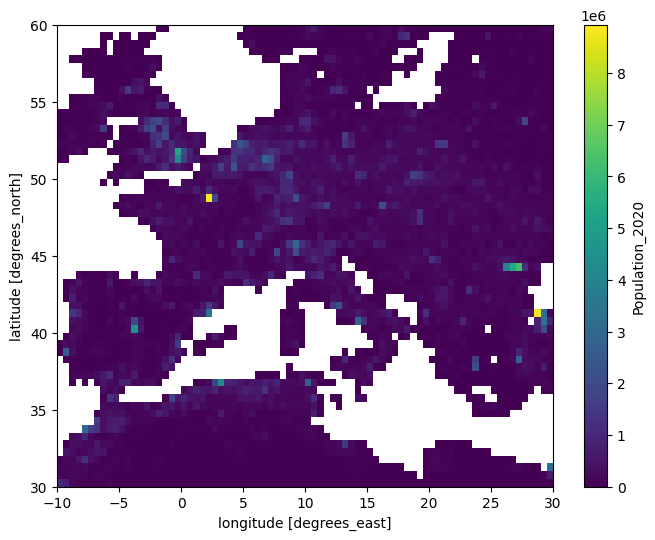

In [115]:
da_pop20 = ds_pop_red['Population_2020']
da_sel = da_pop20.where((da_pop20.latitude >= 30) & (da_pop20.latitude <= 60) & (da_pop20.longitude >= -10) & (da_pop20.longitude <= 30), drop=True)
da_sel[:,:].plot(size=6)

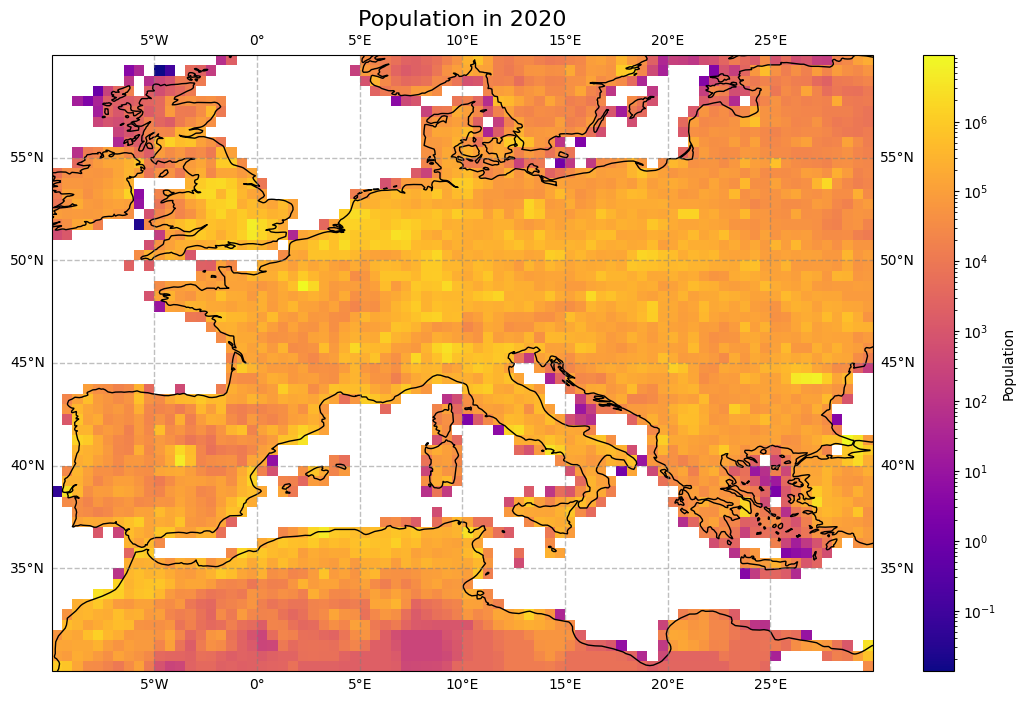

In [116]:
from matplotlib.colors import LogNorm

# create the figure panel and the map using the Cartopy PlateCarree projection
fig, ax = plt.subplots(1, 1, figsize = (16, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data
im = plt.pcolormesh(da_sel.longitude, da_sel.latitude, da_sel, norm=LogNorm(), cmap='plasma') 

# Set the figure title, add lat/lon grid and coastlines
ax.set_title('Population in 2020', fontsize=16)
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--') 
ax.coastlines(color='black')
ax.set_extent([-10, 30, 30, 60], crs=ccrs.PlateCarree())

# Specify the colourbar
cbar = plt.colorbar(im,fraction=0.05, pad=0.04)
cbar.set_label('Population') 

# Save the figure
#fig.savefig(f'{DATADIR}ERA5_global_2016_anomaly_world.png')

# 2. Work occupation per country

Data for work occupation:
https://ilostat.ilo.org/data/#

In [117]:
Occup_data = f'../Climate_Data/EMP_TEMP_AGE_OC2_NB_A-filtered-2024-08-27.csv'


In [118]:
df_occup = pd.read_csv(Occup_data)

In [119]:
print(df_occup.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109609 entries, 0 to 109608
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ref_area.label        109609 non-null  object 
 1   source.label          109609 non-null  object 
 2   indicator.label       109609 non-null  object 
 3   classif1.label        109609 non-null  object 
 4   classif2.label        109609 non-null  object 
 5   time                  109609 non-null  int64  
 6   obs_value             103615 non-null  float64
 7   obs_status.label      22506 non-null   object 
 8   note_classif.label    560 non-null     object 
 9   note_indicator.label  10160 non-null   object 
 10  note_source.label     109609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 9.2+ MB
None


In [120]:
df_occup.head()

,ref_area.label,source.label,indicator.label,classif1.label,classif2.label,time,obs_value,obs_status.label,note_classif.label,note_indicator.label,note_source.label
0,Afghanistan,LFS - Labour Force Survey,Employment by age and occupation - ISCO level ...,"Age (Youth, adults): 15+","Occupation (ISCO-08), 2 digit level: Total",2021,7679.474,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...
1,Afghanistan,LFS - Labour Force Survey,Employment by age and occupation - ISCO level ...,"Age (Youth, adults): 15+","Occupation (ISCO-08), 2 digit level: 02 - Non-...",2021,209.728,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...
2,Afghanistan,LFS - Labour Force Survey,Employment by age and occupation - ISCO level ...,"Age (Youth, adults): 15+","Occupation (ISCO-08), 2 digit level: 11 - Chie...",2021,7.876,Unreliable,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...
3,Afghanistan,LFS - Labour Force Survey,Employment by age and occupation - ISCO level ...,"Age (Youth, adults): 15+","Occupation (ISCO-08), 2 digit level: 12 - Admi...",2021,89.945,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...
4,Afghanistan,LFS - Labour Force Survey,Employment by age and occupation - ISCO level ...,"Age (Youth, adults): 15+","Occupation (ISCO-08), 2 digit level: 13 - Prod...",2021,23.102,NaN,NaN,NaN,Repository: ILO-STATISTICS - Micro data proces...


In [121]:
print(df_occup['classif1.label'].value_counts())

classif1.label
Age (Youth, adults): 15+      37314
Age (Youth, adults): 25+      37263
Age (Youth, adults): 15-24    35032
Name: count, dtype: int64


In [122]:
df_occup_15 = df_occup[df_occup['classif1.label'] == 'Age (Youth, adults): 15+']
print(df_occup_15['classif1.label'].value_counts())

classif1.label
Age (Youth, adults): 15+    37314
Name: count, dtype: int64


In [123]:
# Group by 'Column1' and 'Column2' and find the index of the maximum value in 'Column3'
idx = df_occup_15.groupby(['ref_area.label', 'classif2.label'])['time'].idxmax()

# Use the indices to filter the DataFrame
df_occup_15_y = df_occup_15.loc[idx]

In [124]:
df_filt = df_occup_15_y[['ref_area.label','classif2.label','obs_value']]
df_filt.head()

,ref_area.label,classif2.label,obs_value
106,Afghanistan,"Occupation (ISCO-08), 2 digit level: 01 - Comm...",41.231
1,Afghanistan,"Occupation (ISCO-08), 2 digit level: 02 - Non-...",209.728
108,Afghanistan,"Occupation (ISCO-08), 2 digit level: 03 - Arme...",119.735
2,Afghanistan,"Occupation (ISCO-08), 2 digit level: 11 - Chie...",7.876
3,Afghanistan,"Occupation (ISCO-08), 2 digit level: 12 - Admi...",89.945


In [125]:
pd.set_option('display.max_rows', None)
print(df_filt['classif2.label'].nunique())
print(df_filt['classif2.label'].value_counts())

75
classif2.label
Occupation (ISCO-08), 2 digit level: 21 - Science and engineering professionals                                                147
Occupation (ISCO-08), 2 digit level: 23 - Teaching professionals                                                               147
Occupation (ISCO-08), 2 digit level: 22 - Health professionals                                                                 147
Occupation (ISCO-08), 2 digit level: 72 - Metal, machinery and related trades workers                                          147
Occupation (ISCO-08), 2 digit level: 71 - Building and related trades workers, excluding electricians                          147
Occupation (ISCO-08), 2 digit level: 81 - Stationary plant and machine operators                                               147
Occupation (ISCO-08), 2 digit level: 73 - Handicraft and printing workers                                                      147
Occupation (ISCO-08), 2 digit level: 51 - Personal service worker

In [126]:
df_filt['Occ_index'] = df_filt['classif2.label'].str[37:39]
print(df_filt['Occ_index'].nunique())
print(df_filt['Occ_index'].value_counts())

45
Occ_index
22    163
21    163
23    163
93    163
91    163
71    163
72    163
73    163
81    163
51    163
52    163
61    163
41    163
To    163
83    163
92    162
24    162
34    162
31    162
32    162
74    162
11    162
33    161
42    161
12    161
13    160
82    156
62    155
53    144
43    143
14    142
96    142
75    141
26    141
94    140
54    140
35    140
44    139
25    139
No    138
95    131
01    121
63    113
03    104
02    102
Name: count, dtype: int64


/var/folders/hz/grztnvrj73x44n1hcwn7gthh0000gn/T/ipykernel_2115/329488459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt['Occ_index'] = df_filt['classif2.label'].str[37:39]


In [127]:
mapping = {
    '11': '1',
    '12': '1',
    '13': '1',
    '14': '2',
    '21': '1',
    '22': '3',
    '23': '1',
    '24': '1',
    '25': '1',
    '26': '1',
    '31': '2',
    '32': '3',
    '33': '2',
    '34': '3',
    '35': '2',
    '41': '1',
    '42': '1',
    '43': '1',
    '44': '1',
    '51': '2',
    '52': '2',
    '53': '3',
    '54': '3',
    '61': '4',
    '62': '4',
    '63': '4',
    '71': '4',
    '72': '3',
    '73': '2',
    '74': '3',
    '75': '3',
    '81': '3',
    '82': '2',
    '83': '3',
    '91': '3',
    '92': '4',
    '93': '4',
    '94': '3',
    '95': '3',
    '96': '3',
}

In [128]:
df_filt['Occ_index_4'] = df_filt['Occ_index'].map(mapping)
df_filt.head()

/var/folders/hz/grztnvrj73x44n1hcwn7gthh0000gn/T/ipykernel_2115/3234527818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt['Occ_index_4'] = df_filt['Occ_index'].map(mapping)


,ref_area.label,classif2.label,obs_value,Occ_index,Occ_index_4
106,Afghanistan,"Occupation (ISCO-08), 2 digit level: 01 - Comm...",41.231,01,NaN
1,Afghanistan,"Occupation (ISCO-08), 2 digit level: 02 - Non-...",209.728,02,NaN
108,Afghanistan,"Occupation (ISCO-08), 2 digit level: 03 - Arme...",119.735,03,NaN
2,Afghanistan,"Occupation (ISCO-08), 2 digit level: 11 - Chie...",7.876,11,1
3,Afghanistan,"Occupation (ISCO-08), 2 digit level: 12 - Admi...",89.945,12,1


In [129]:
len(df_filt)

6793

In [130]:
df_cleaned = df_filt.dropna(subset=['Occ_index_4'])
df_cleaned = df_cleaned.drop(columns=['classif2.label', 'Occ_index'])
df_cleaned = df_cleaned.groupby(['ref_area.label', 'Occ_index_4'])['obs_value'].sum().reset_index()
df_cleaned = df_cleaned.rename(columns={'ref_area.label': 'Country_name', 'obs_value': 'Nb_workers'})
df_cleaned.head()

,Country_name,Occ_index_4,Nb_workers
0,Afghanistan,1,528.843
1,Afghanistan,2,1090.351
2,Afghanistan,3,1009.906
3,Afghanistan,4,4726.209
4,Albania,1,163.687


countries code:
https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/blob/master/all/all.csv

In [131]:
Countries_3d = f'../Climate_Data/countries_3digit.csv'
df_countries_3d = pd.read_csv(Countries_3d)
df_countries_3d = df_countries_3d[['name','country-code']]
df_countries_3d = df_countries_3d.rename(columns={'name': 'Country_name'})
df_countries_3d.head()

,Country_name,country-code
0,Afghanistan,4
1,Åland Islands,248
2,Albania,8
3,Algeria,12
4,American Samoa,16


In [132]:
df_occup_cc = pd.merge(df_cleaned, df_countries_3d, on='Country_name', how='left')
df_occup_cc.head()

,Country_name,Occ_index_4,Nb_workers,country-code
0,Afghanistan,1,528.843,4.0
1,Afghanistan,2,1090.351,4.0
2,Afghanistan,3,1009.906,4.0
3,Afghanistan,4,4726.209,4.0
4,Albania,1,163.687,8.0


In [133]:
unique_values = np.unique(df_occup_cc['country-code'])

# Print the unique values
print("Unique Values Appearing at Least Once:")
print(unique_values)
len(unique_values)

Unique Values Appearing at Least Once:
[  4.   8.  24.  32.  36.  40.  44.  50.  52.  56.  64.  70.  72.  76.
  84.  90.  96. 100. 104. 108. 112. 116. 144. 152. 170. 180. 184. 188.
 191. 196. 203. 204. 208. 214. 218. 222. 231. 233. 242. 246. 250. 268.
 270. 276. 288. 296. 300. 308. 320. 324. 328. 340. 348. 352. 356. 360.
 368. 372. 376. 380. 384. 388. 392. 400. 404. 417. 418. 422. 426. 428.
 430. 440. 442. 450. 462. 466. 480. 484. 496. 499. 500. 508. 516. 520.
 524. 548. 558. 562. 566. 570. 578. 584. 585. 586. 591. 598. 604. 608.
 616. 620. 624. 626. 642. 643. 646. 678. 686. 688. 690. 694. 702. 703.
 704. 705. 706. 710. 716. 724. 729. 740. 748. 752. 756. 762. 764. 768.
 772. 776. 780. 784. 788. 792. 798. 800. 804. 807. 818. 826. 834. 840.
 854. 858. 876. 882. 887. 894.  nan]


147

# 3. Work occupation per country on spatial grid

In [134]:
ds_pop_red

<xarray.Dataset> Size: 2MB
Dimensions:          (latitude: 360, longitude: 720)
Coordinates:
  * latitude         (latitude) float64 3kB 89.75 89.25 88.75 ... -89.25 -89.75
  * longitude        (longitude) float64 6kB -179.8 -179.2 ... 179.2 179.8
Data variables:
    Population_2020  (latitude, longitude) float32 1MB nan nan nan ... nan nan
    Country_code     (latitude, longitude) float32 1MB 3.277e+04 ... 3.277e+04

In [135]:
print(df_occup_cc.head())
len(df_occup_cc)

  Country_name Occ_index_4  Nb_workers  country-code
0  Afghanistan           1     528.843           4.0
1  Afghanistan           2    1090.351           4.0
2  Afghanistan           3    1009.906           4.0
3  Afghanistan           4    4726.209           4.0
4      Albania           1     163.687           8.0


608

In [136]:
df_occup_cc['Occ_index_4'] = df_occup_cc['Occ_index_4'].astype(int)
type(df_occup_cc['Occ_index_4'].iloc[0])

numpy.int64

In [137]:
# Assume country codes are in a variable named 'country_code' in your xarray dataset
country_codes = ds_pop_red['Country_code']

# Iterate over the DataFrame and update the xarray dataset
for _, row in df_occup_cc.iterrows():
    country_code = row['country-code']
    variable_number = row['Occ_index_4']
    variable_value = row['Nb_workers']
    
    # Create a mask for the corresponding country code
    mask = (country_codes == country_code)
    
    # Create or update the variable in the xarray dataset
    var_name = f'workers_{variable_number}'
    if var_name not in ds_pop_red:
        ds_pop_red[var_name] = xr.DataArray(np.zeros_like(country_codes, dtype=np.float32),
                                    dims=['latitude', 'longitude'])
    
    # Assign the value to the masked locations
    ds_pop_red[var_name].values[mask.values] = variable_value

# Print the updated dataset to confirm
ds_pop_red

<xarray.Dataset> Size: 6MB
Dimensions:          (latitude: 360, longitude: 720)
Coordinates:
  * latitude         (latitude) float64 3kB 89.75 89.25 88.75 ... -89.25 -89.75
  * longitude        (longitude) float64 6kB -179.8 -179.2 ... 179.2 179.8
Data variables:
    Population_2020  (latitude, longitude) float32 1MB nan nan nan ... nan nan
    Country_code     (latitude, longitude) float32 1MB 3.277e+04 ... 3.277e+04
    workers_1        (latitude, longitude) float32 1MB 0.0 0.0 0.0 ... 0.0 0.0
    workers_2        (latitude, longitude) float32 1MB 0.0 0.0 0.0 ... 0.0 0.0
    workers_3        (latitude, longitude) float32 1MB 0.0 0.0 0.0 ... 0.0 0.0
    workers_4        (latitude, longitude) float32 1MB 0.0 0.0 0.0 ... 0.0 0.0

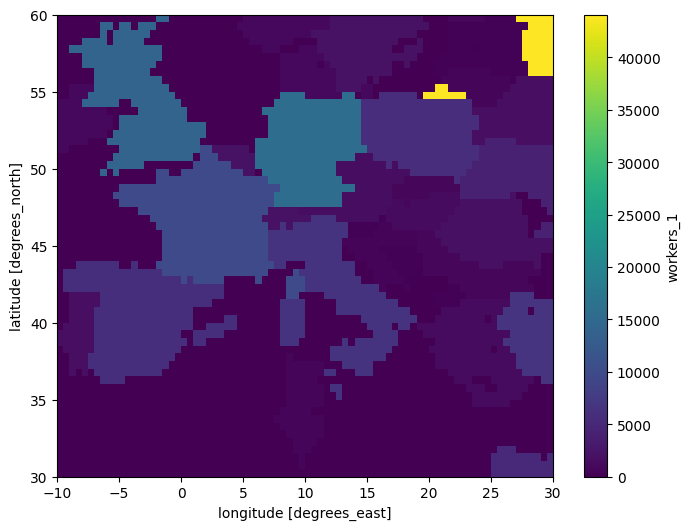

In [138]:
da_sel2 = ds_pop_red['workers_1'].where((ds_pop_red.latitude >= 30) & (ds_pop_red.latitude <= 60) & (ds_pop_red.longitude >= -10) & (ds_pop_red.longitude <= 30), drop=True)
da_sel2[:,:].plot(size=6)

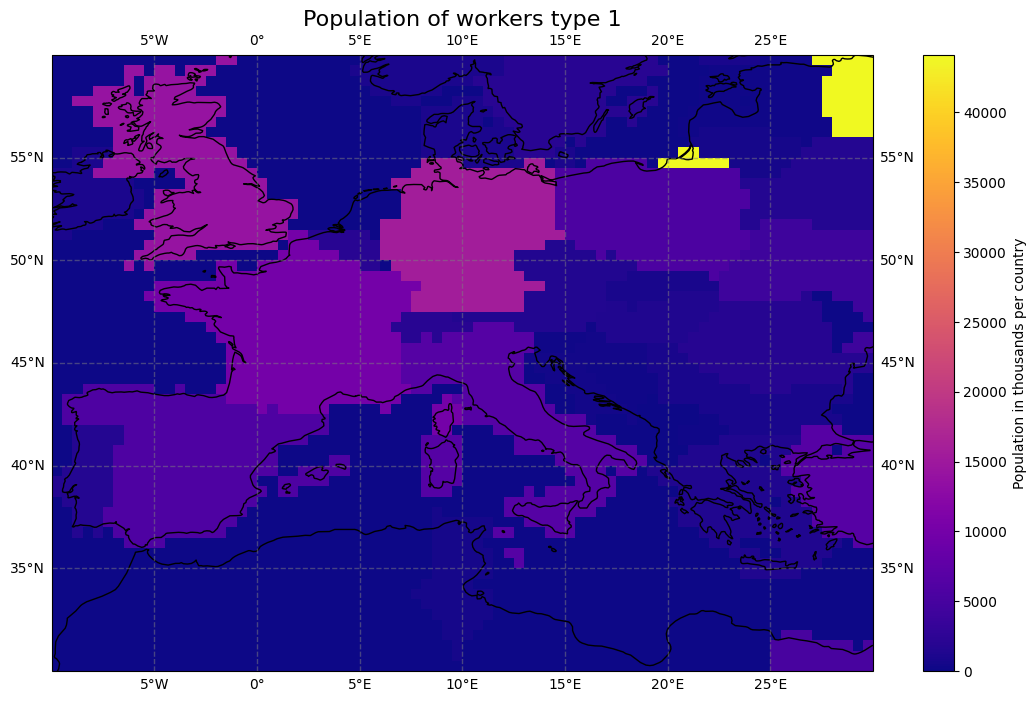

In [139]:
# create the figure panel and the map using the Cartopy PlateCarree projection
fig, ax = plt.subplots(1, 1, figsize = (16, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data
im = plt.pcolormesh(da_sel2.longitude, da_sel2.latitude, da_sel2, cmap='plasma') 

# Set the figure title, add lat/lon grid and coastlines
ax.set_title('Population of workers type 1', fontsize=16)
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--') 
ax.coastlines(color='black')
ax.set_extent([-10, 30, 30, 60], crs=ccrs.PlateCarree())

# Specify the colourbar
cbar = plt.colorbar(im,fraction=0.05, pad=0.04)
cbar.set_label('Population in thousands per country') 

# Save the figure
#fig.savefig(f'{DATADIR}ERA5_global_2016_anomaly_world.png')

# 4. Work occupation per grid cell

In [140]:
ds_workers = ds_pop_red
ds_workers

<xarray.Dataset> Size: 6MB
Dimensions:          (latitude: 360, longitude: 720)
Coordinates:
  * latitude         (latitude) float64 3kB 89.75 89.25 88.75 ... -89.25 -89.75
  * longitude        (longitude) float64 6kB -179.8 -179.2 ... 179.2 179.8
Data variables:
    Population_2020  (latitude, longitude) float32 1MB nan nan nan ... nan nan
    Country_code     (latitude, longitude) float32 1MB 3.277e+04 ... 3.277e+04
    workers_1        (latitude, longitude) float32 1MB 0.0 0.0 0.0 ... 0.0 0.0
    workers_2        (latitude, longitude) float32 1MB 0.0 0.0 0.0 ... 0.0 0.0
    workers_3        (latitude, longitude) float32 1MB 0.0 0.0 0.0 ... 0.0 0.0
    workers_4        (latitude, longitude) float32 1MB 0.0 0.0 0.0 ... 0.0 0.0

In [141]:
population = ds_workers['Population_2020']
country = ds_workers['Country_code']
print("Population dimensions:", population.dims)
print("Country dimensions:", country.dims)

Population dimensions: ('latitude', 'longitude')
Country dimensions: ('latitude', 'longitude')


In [142]:
total_population_by_country = population.groupby(country).sum(dim=xr.ALL_DIMS)

In [146]:
# Convert the total_population_by_country DataArray to a dictionary for fast lookup
total_population_dict = total_population_by_country.to_series().to_dict()
total_population_dict

{4.0: 31149460.0,
 8.0: 2717437.0,
 12.0: 44886500.0,
 16.0: 56439.12890625,
 24.0: 36883072.0,
 28.0: 96915.25,
 31.0: 9865920.0,
 32.0: 47305544.0,
 36.0: 21460698.0,
 40.0: 9052226.0,
 44.0: 410238.03125,
 48.0: 1883437.125,
 50.0: 160424416.0,
 51.0: 2928480.75,
 52.0: 289431.46875,
 56.0: 13513390.0,
 60.0: 66846.1875,
 64.0: 1096952.25,
 68.0: 11841085.0,
 70.0: 2967429.5,
 72.0: 2152961.0,
 76.0: 216846320.0,
 84.0: 364609.4375,
 90.0: 675521.9375,
 92.0: 5285.8818359375,
 96.0: 546349.25,
 100.0: 6721202.0,
 104.0: 50343188.0,
 108.0: 12628671.0,
 112.0: 9213139.0,
 116.0: 19554434.0,
 120.0: 29182782.0,
 124.0: 37321912.0,
 132.0: 546389.9375,
 136.0: 76392.984375,
 140.0: 4496644.5,
 144.0: 21639618.0,
 148.0: 16324740.0,
 152.0: 20736944.0,
 156.0: 1445545472.0,
 158.0: 24068530.0,
 170.0: 62595984.0,
 174.0: 892913.5,
 175.0: 270399.90625,
 178.0: 10840991.0,
 180.0: 108618496.0,
 184.0: 18049.298828125,
 188.0: 4770009.0,
 191.0: 4548367.0,
 192.0: 11192106.0,
 196.0: 1365

In [148]:
# Map aggregated values back to the original grid
def map_population_to_raster(country_code_value):
    return total_population_dict.get(country_code_value, np.nan)

mapped_population = xr.apply_ufunc(
    map_population_to_raster,
    country,
    vectorize=True,
    dask='allowed'
)

In [150]:
ds_workers['country_population'] = mapped_population
ds_workers

<xarray.Dataset> Size: 8MB
Dimensions:             (latitude: 360, longitude: 720)
Coordinates:
  * latitude            (latitude) float64 3kB 89.75 89.25 ... -89.25 -89.75
  * longitude           (longitude) float64 6kB -179.8 -179.2 ... 179.2 179.8
Data variables:
    Population_2020     (latitude, longitude) float32 1MB nan nan ... nan nan
    Country_code        (latitude, longitude) float32 1MB 3.277e+04 ... 3.277...
    workers_1           (latitude, longitude) float32 1MB 0.0 0.0 ... 0.0 0.0
    workers_2           (latitude, longitude) float32 1MB 0.0 0.0 ... 0.0 0.0
    workers_3           (latitude, longitude) float32 1MB 0.0 0.0 ... 0.0 0.0
    workers_4           (latitude, longitude) float32 1MB 0.0 0.0 ... 0.0 0.0
    country_population  (latitude, longitude) float64 2MB 2.979e+05 ... 2.979...

In [154]:
# number of workers of each type in each grid cell (*1000 because workers by country are expressed in 1000)
ds_workers['workers_1_grid'] = 1000 * ds_workers['workers_1'] * ds_workers['Population_2020'] / ds_workers['country_population']
ds_workers['workers_2_grid'] = 1000 * ds_workers['workers_2'] * ds_workers['Population_2020'] / ds_workers['country_population']
ds_workers['workers_3_grid'] = 1000 * ds_workers['workers_3'] * ds_workers['Population_2020'] / ds_workers['country_population']
ds_workers['workers_4_grid'] = 1000 * ds_workers['workers_4'] * ds_workers['Population_2020'] / ds_workers['country_population']
ds_workers

<xarray.Dataset> Size: 17MB
Dimensions:             (latitude: 360, longitude: 720)
Coordinates:
  * latitude            (latitude) float64 3kB 89.75 89.25 ... -89.25 -89.75
  * longitude           (longitude) float64 6kB -179.8 -179.2 ... 179.2 179.8
Data variables:
    Population_2020     (latitude, longitude) float32 1MB nan nan ... nan nan
    Country_code        (latitude, longitude) float32 1MB 3.277e+04 ... 3.277...
    workers_1           (latitude, longitude) float32 1MB 0.0 0.0 ... 0.0 0.0
    workers_2           (latitude, longitude) float32 1MB 0.0 0.0 ... 0.0 0.0
    workers_3           (latitude, longitude) float32 1MB 0.0 0.0 ... 0.0 0.0
    workers_4           (latitude, longitude) float32 1MB 0.0 0.0 ... 0.0 0.0
    country_population  (latitude, longitude) float64 2MB 2.979e+05 ... 2.979...
    workers_1_grid      (latitude, longitude) float64 2MB nan nan ... nan nan
    workers_2_grid      (latitude, longitude) float64 2MB nan nan ... nan nan
    workers_3_grid      (latitude, longitude) float64 2MB nan nan ... nan nan
    workers_4_grid      (latitude, longitude) float64 2MB nan nan ... nan nan

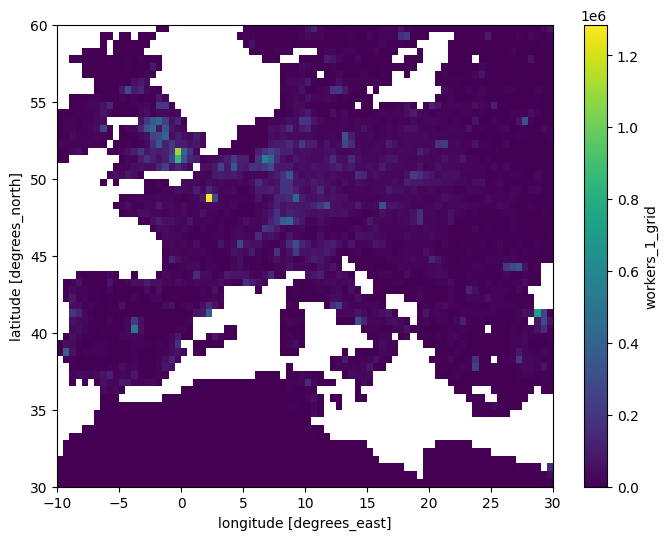

In [159]:
da_sel3 = ds_workers['workers_1_grid'].where((ds_workers.latitude >= 30) & (ds_workers.latitude <= 60) & (ds_workers.longitude >= -10) & (ds_workers.longitude <= 30), drop=True)
da_sel3[:,:].plot(size=6)

# 5. Conclusion

In [160]:
ds_workers

<xarray.Dataset> Size: 17MB
Dimensions:             (latitude: 360, longitude: 720)
Coordinates:
  * latitude            (latitude) float64 3kB 89.75 89.25 ... -89.25 -89.75
  * longitude           (longitude) float64 6kB -179.8 -179.2 ... 179.2 179.8
Data variables:
    Population_2020     (latitude, longitude) float32 1MB nan nan ... nan nan
    Country_code        (latitude, longitude) float32 1MB 3.277e+04 ... 3.277...
    workers_1           (latitude, longitude) float32 1MB 0.0 0.0 ... 0.0 0.0
    workers_2           (latitude, longitude) float32 1MB 0.0 0.0 ... 0.0 0.0
    workers_3           (latitude, longitude) float32 1MB 0.0 0.0 ... 0.0 0.0
    workers_4           (latitude, longitude) float32 1MB 0.0 0.0 ... 0.0 0.0
    country_population  (latitude, longitude) float64 2MB 2.979e+05 ... 2.979...
    workers_1_grid      (latitude, longitude) float64 2MB nan nan ... nan nan
    workers_2_grid      (latitude, longitude) float64 2MB nan nan ... nan nan
    workers_3_grid      (latitude, longitude) float64 2MB nan nan ... nan nan
    workers_4_grid      (latitude, longitude) float64 2MB nan nan ... nan nan